# Principal Component Analysis

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from sklearn.datasets import fetch_olivetti_faces # import the database

In [33]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\khush\scikit_learn_data


In [34]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

data: This key contains a numpy array of shape (400, 4096) representing the preprocessed face images. Each row in the array corresponds to a flattened image of shape (64, 64) pixels.

images: This key contains a numpy array of shape (400, 64, 64) representing the raw face images. Each element in the array corresponds to an image of shape (64, 64) pixels.

In [35]:
data = faces.data
type(data)

numpy.ndarray

In [36]:
data.shape # shape of the flattened image data.

(400, 4096)

In [37]:
data[:4]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       [0.1983471 , 0.19421488, 0.19421488, ..., 0.75206614, 0.75206614,
        0.73966944]], dtype=float32)

In [38]:
data[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], dtype=float32)

In [39]:
data[0].shape

(4096,)

In [40]:
sample_face = data[45].reshape(64, 64)

In [41]:
sample_face.shape

(64, 64)

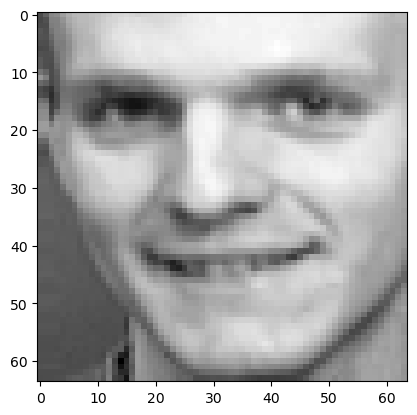

In [49]:
plt.imshow(sample_face, cmap='gray');

## Applying PCA

In [52]:
from sklearn.decomposition import PCA

In [ ]:
# d-dim = 4096
# d' dim = 100  where d' are the 'number of components' n_components

In [53]:
n_components = 100 # d'
pca = PCA(n_components)

In [54]:
pca.fit(data)

PCA(n_components=100)

In [55]:
new_data = pca.transform(data) # (400, 4096) goes to (400, 100)

In [57]:
new_data.shape

(400, 100)

In [60]:
new_data[0]

array([-6.432612  , -0.70366794, -1.4300232 ,  1.2785363 ,  2.5643978 ,
       -0.9505925 ,  2.0817623 , -2.9379456 , -0.3738768 ,  0.24310267,
       -1.3543134 ,  1.1725733 ,  0.39208058,  0.35820514,  0.7542007 ,
        0.2703792 ,  0.5147007 , -0.5964261 , -0.15578002, -0.28312683,
        0.13552676,  0.73602796, -0.12472049,  0.42592502,  0.4994607 ,
       -0.5080098 ,  0.7129393 , -0.14953172, -0.02983764,  0.59857315,
       -0.51041186,  0.34152257, -0.08961916,  0.81481934,  0.13546835,
       -0.18419257, -0.31227684, -0.56968695, -0.39412662,  0.5037639 ,
        0.27564806,  0.18148464,  0.01726302,  0.5620618 , -0.4795376 ,
        0.2797937 , -0.30600196,  0.27857563,  0.25317854,  0.60077715,
        0.36476207, -0.10363458, -0.17993912,  0.06792676,  0.08363217,
       -0.3924909 ,  0.96932805,  0.0405193 , -0.09410995, -0.14818864,
        0.3472593 ,  0.7046318 ,  0.21836257, -0.30516455, -0.00879739,
       -0.51719326, -0.08877372, -0.4490323 ,  0.36879122, -0.35

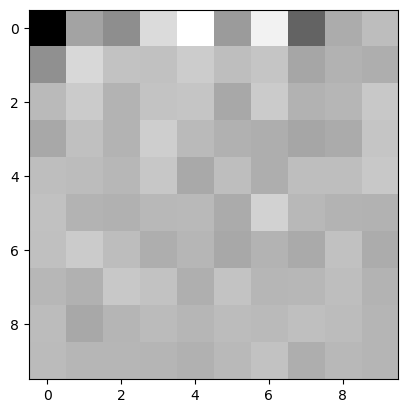

In [66]:
plt.imshow(new_data[0].reshape(10, 10), cmap='gray'); # You have to do the inverse transform first.

In [67]:
# (400, 4096)
reconstructed_data = pca.inverse_transform(new_data)

In [68]:
reconstructed_data

array([[0.28717548, 0.3894361 , 0.44686547, ..., 0.17019628, 0.1320019 ,
        0.1470147 ],
       [0.56121546, 0.5296768 , 0.48933637, ..., 0.14049496, 0.1589509 ,
        0.13251103],
       [0.2531997 , 0.32351753, 0.45756066, ..., 0.1636707 , 0.15712161,
        0.15044273],
       ...,
       [0.47817397, 0.53718203, 0.60570484, ..., 0.19406937, 0.1740399 ,
        0.19466561],
       [0.2643086 , 0.2745521 , 0.25877726, ..., 0.5410539 , 0.5484662 ,
        0.5323885 ],
       [0.4090921 , 0.4070266 , 0.35954386, ..., 0.32135892, 0.33097255,
        0.3971539 ]], dtype=float32)

In [69]:
reconstructed_data.shape # data has the same shape as the original data after being reconstructed.

(400, 4096)

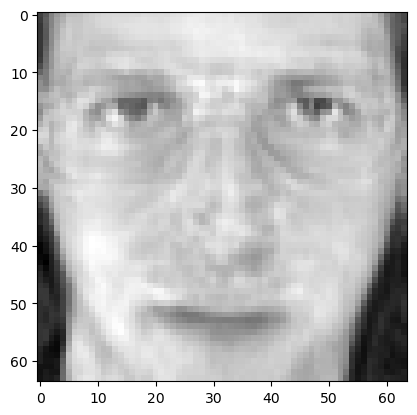

In [71]:
plt.imshow(reconstructed_data[2].reshape(64, 64), cmap='gray');

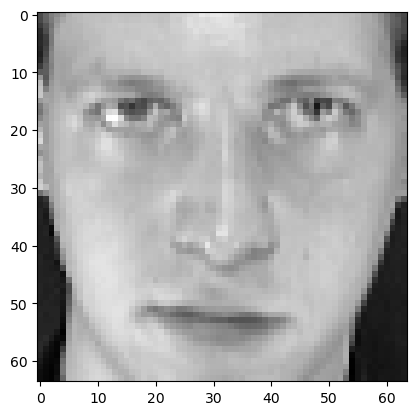

In [73]:
plt.imshow(data[2].reshape(64, 64), cmap ='gray');

The reconstructed image doesn't look too good compared to the original one. Let's use n_components = 300

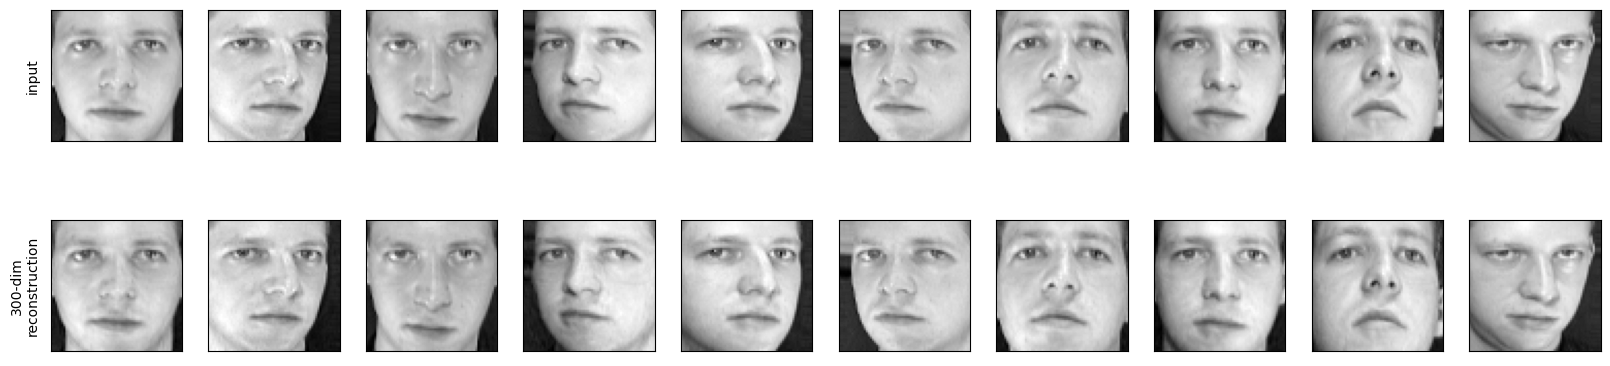

In [79]:
# Set the number of principal components to keep
n_components = 300

# Initialize a PCA object with the specified number of components
pca = PCA(n_components)

# Fit the PCA model to the input data
pca.fit(data)

# Apply PCA to transform the original data into the new reduced-dimensionality representation
new_data = pca.transform(data)  # The shape of `new_data` will be (400, n_components)

# Reconstruct the original data from the reduced-dimensionality representation
reconstructed_data = pca.inverse_transform(new_data)  # The shape of `reconstructed_data` will be (400, 4096)

# Create a plot to compare the original data and its reconstruction
fig, ax = plt.subplots(
    2,  # 2 rows of subplots
    10,  # 10 subplots in each row
    figsize=(20, 5),  # Set the overall size of the plot
    subplot_kw={"xticks": [], "yticks": []},  # Remove the tick marks on the subplots
)

# Loop over the first 10 examples in the data and plot their original and reconstructed versions side-by-side
for i in range(10):
    ax[0, i].imshow(data[i].reshape(64, 64), cmap="gray")  # Plot the original image
    ax[1, i].imshow(reconstructed_data[i].reshape(64, 64), cmap="gray")  # Plot the reconstructed image

# Add y-axis labels to the first column of subplots
ax[0, 0].set_ylabel("input")
ax[1, 0].set_ylabel("{}-dim\nreconstruction".format(n_components));


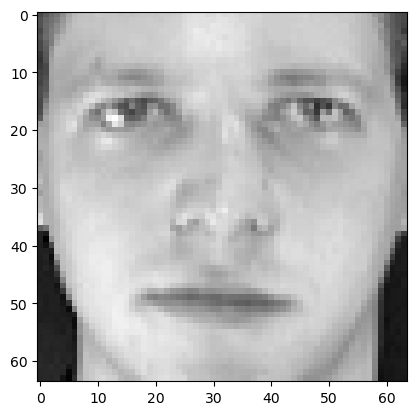

In [76]:
plt.imshow(data[0].reshape(64,64), cmap='gray')

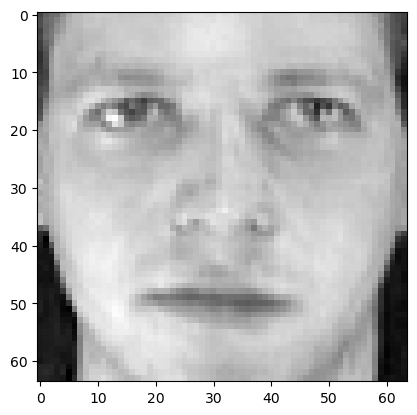

In [77]:
plt.imshow(reconstructed_data[0].reshape(64,64), cmap='gray')

n_components = 300 seems like a good choice.

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/